In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [ ]:
train=pd.read_csv("/content/train_FD001.txt",sep=" ")   ## to read txt into dataframe
test=pd.read_csv("/content/test_FD001.txt",sep=" ")
test_result=pd.read_csv("/content/RUL_FD001.txt",sep=" ",header=None)

In [ ]:
train_copy = train

In [ ]:
train.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
data_train = train

In [ ]:
data_train.columns = col_names
data_train.describe()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,20630.00,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,100.0,518.67,642.680975,1590.523159,1408.934186,1.462000e+01,...,521.413458,2388.096156,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.0,0.00,0.500029,6.131295,9.000636,1.776400e-15,...,0.737569,0.071919,19.076605,0.037506,1.040859e-17,1.548778,0.0,0.0,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.330000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.557500,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20630 non-null  int64  
 1   cycle                                    20630 non-null  int64  
 2   setting_1                                20630 non-null  float64
 3   setting_2                                20630 non-null  float64
 4   setting_3                                20630 non-null  float64
 5   (Fan inlet temperature) (◦R)             20630 non-null  float64
 6   (LPC outlet temperature) (◦R)            20630 non-null  float64
 7   (HPC outlet temperature) (◦R)            20630 non-null  float64
 8   (LPT outlet temperature) (◦R)            20630 non-null  float64
 9   (Fan inlet Pressure) (psia)              20630 non-null  float64
 10  (bypass-duct pressure) (psia)            20630

In [ ]:
data_train.describe()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,20630.00,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,100.0,518.67,642.680975,1590.523159,1408.934186,1.462000e+01,...,521.413458,2388.096156,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.0,0.00,0.500029,6.131295,9.000636,1.776400e-15,...,0.737569,0.071919,19.076605,0.037506,1.040859e-17,1.548778,0.0,0.0,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.330000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.557500,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
data_train.isnull().sum()

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

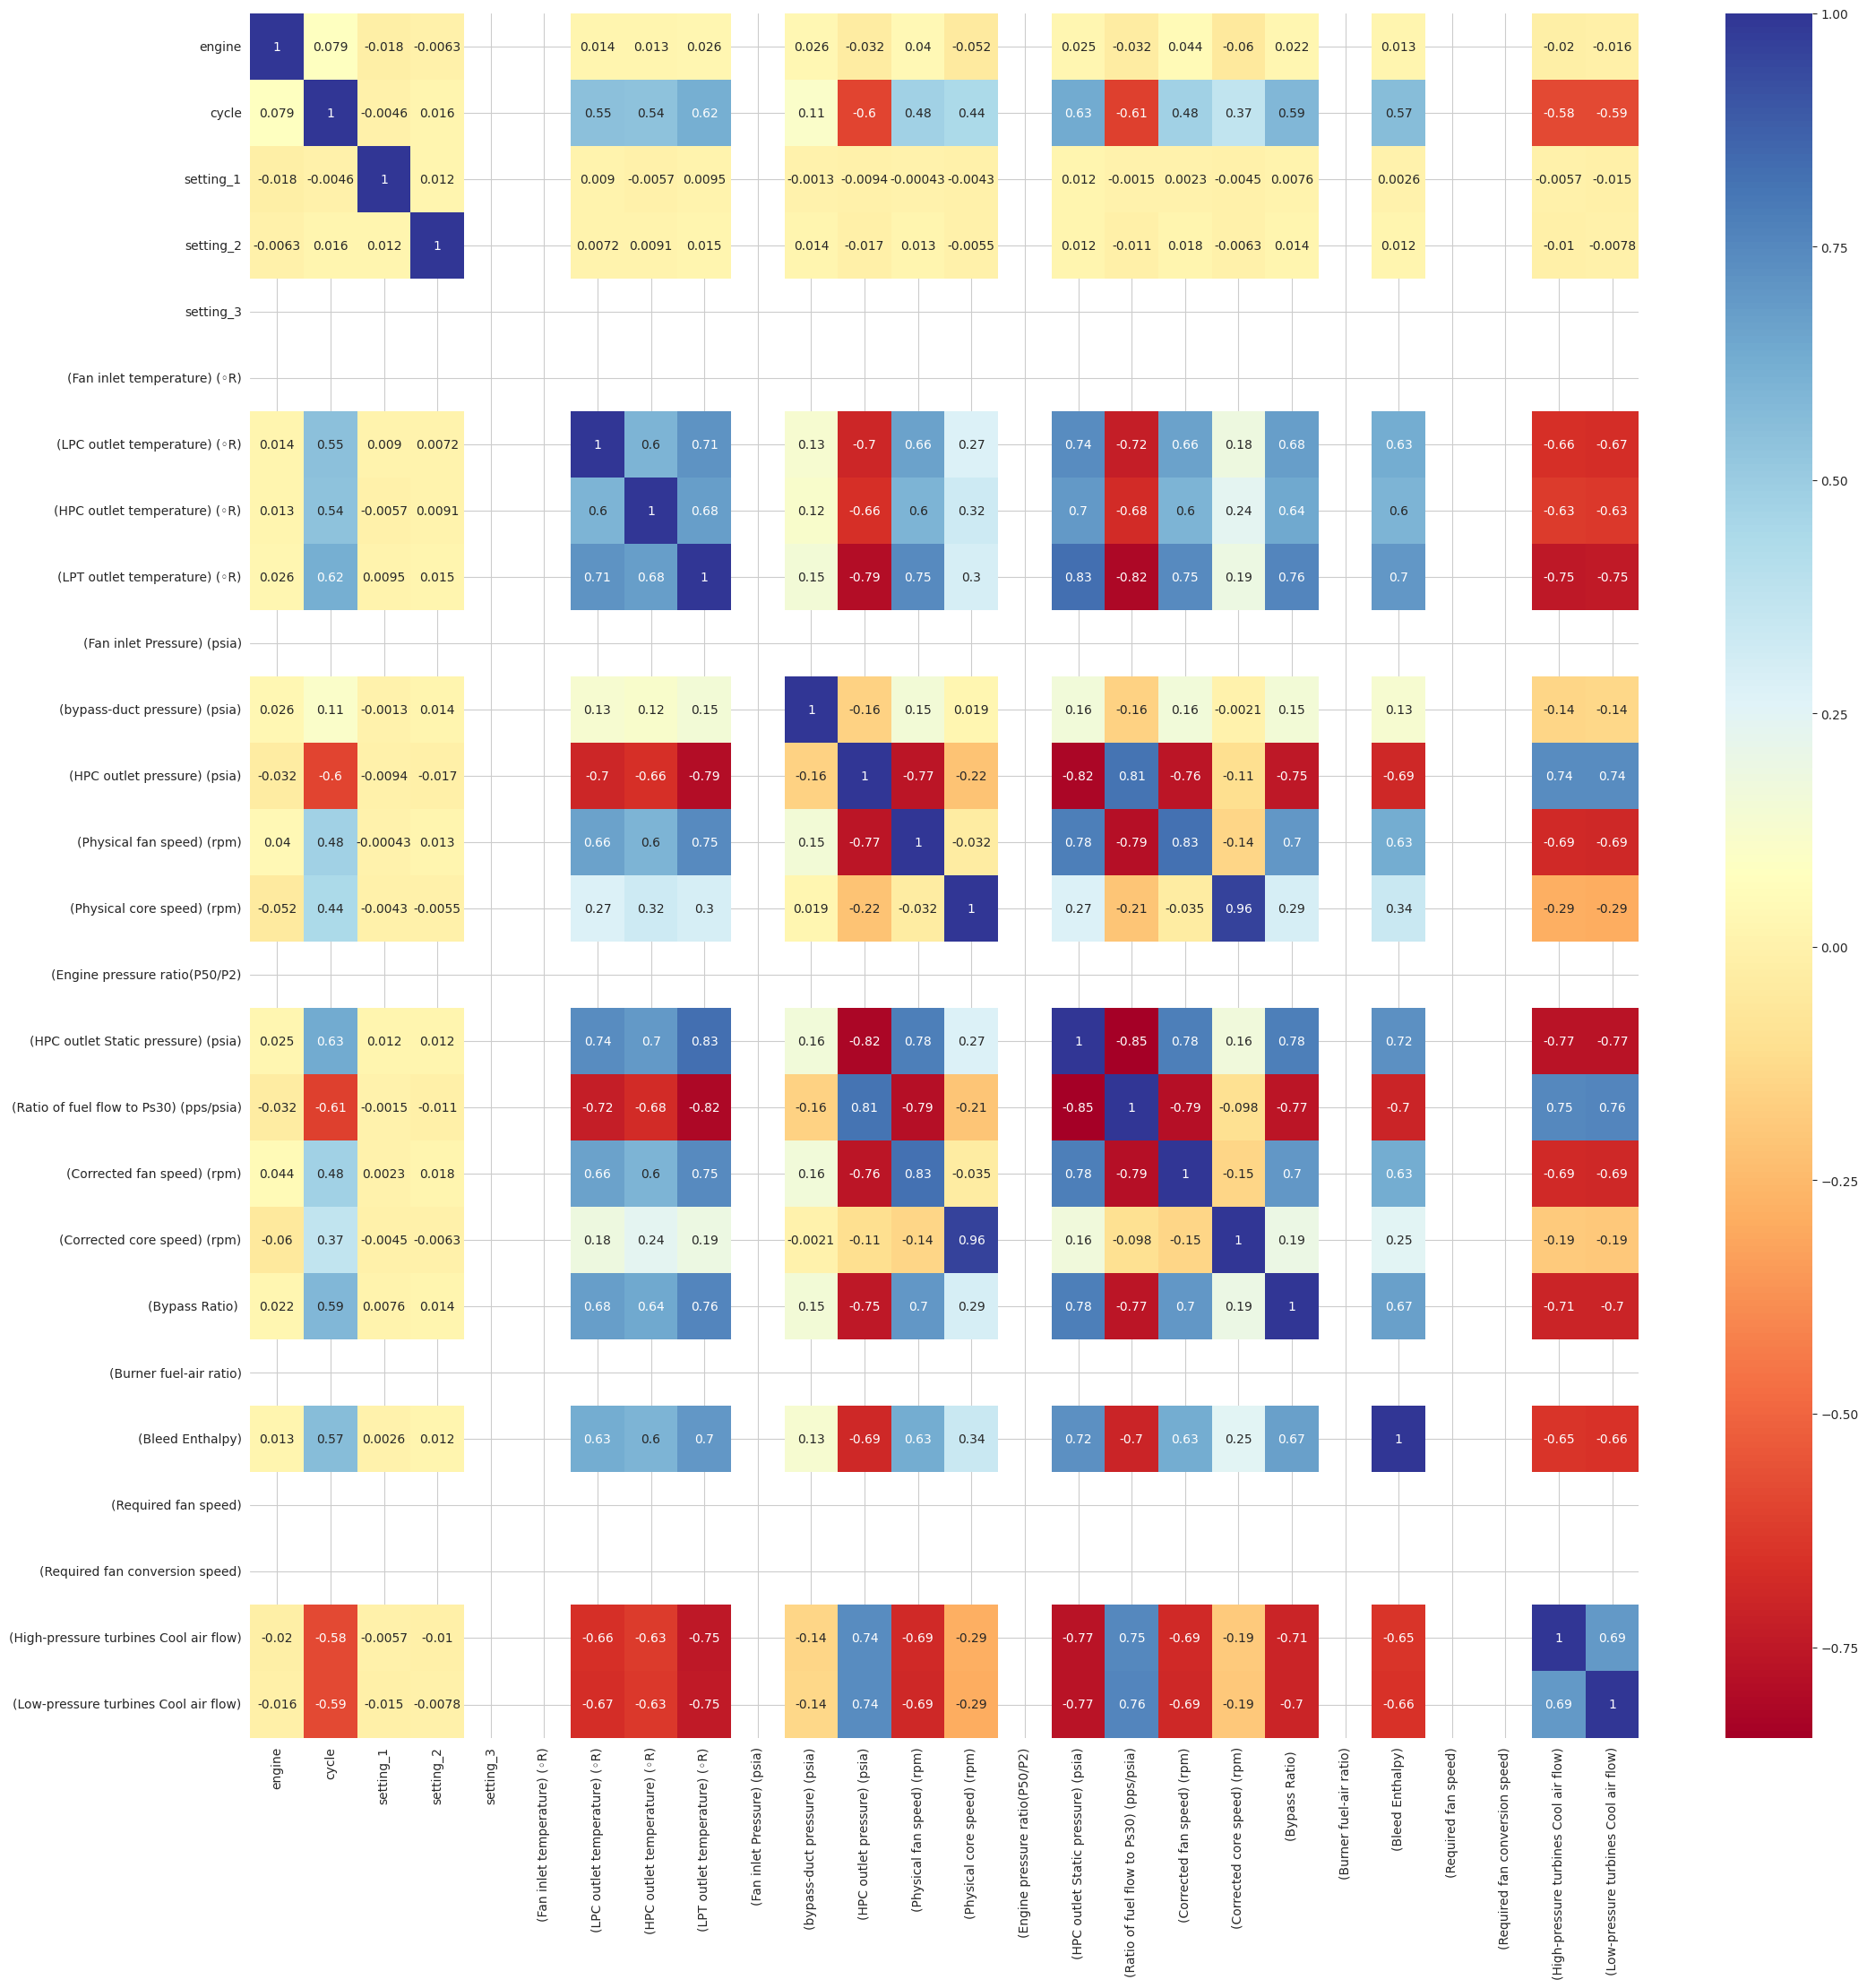

In [ ]:
# we will check for correlation
plt.figure(figsize=(25,25))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
plot_kws={"s": 1}
sns.heatmap(data_train.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
unwanted=[]
for i in data_train.select_dtypes(include=np.number):
    if data_train[i].nunique()==1:
        unwanted.append(i)
print(unwanted)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [ ]:
data_train.drop(columns=unwanted, inplace=True)

In [ ]:
data_train.shape

(20630, 19)

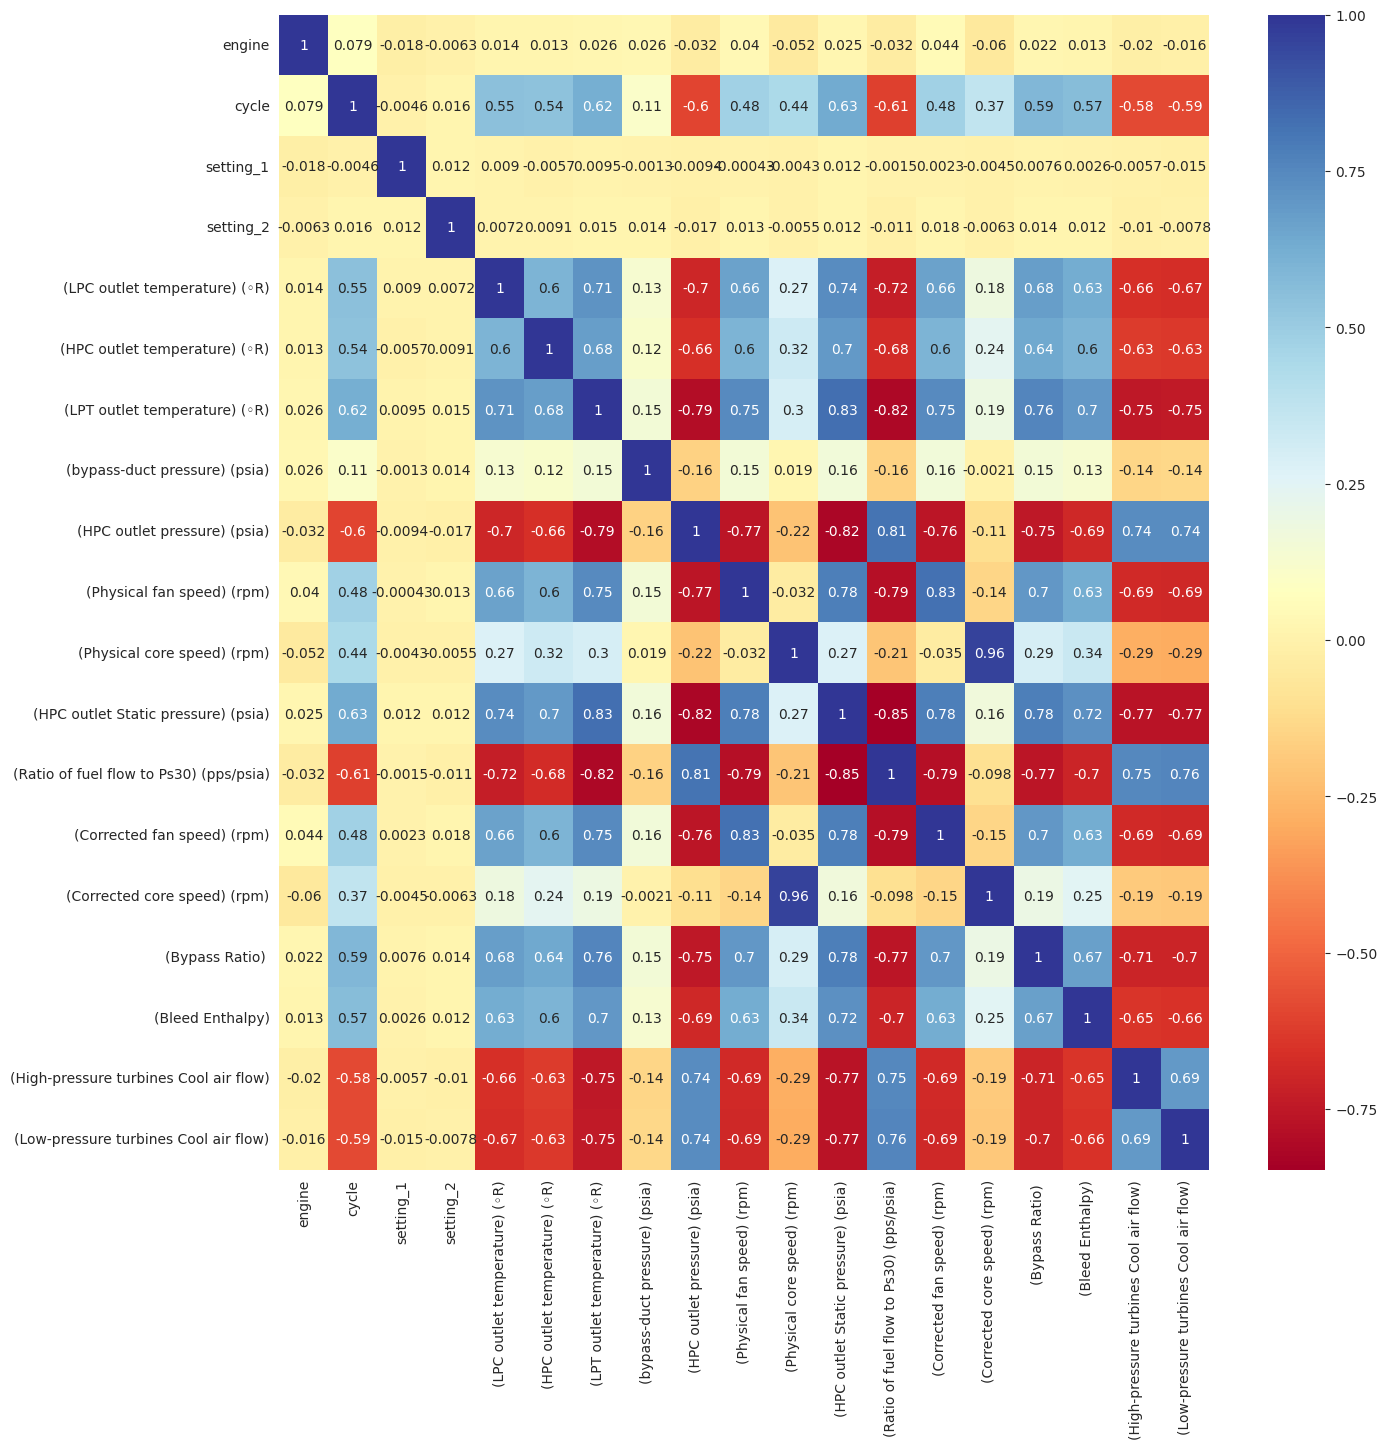

In [ ]:
# we will check for correlation
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
plot_kws={"s": 1}
sns.heatmap(data_train.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')

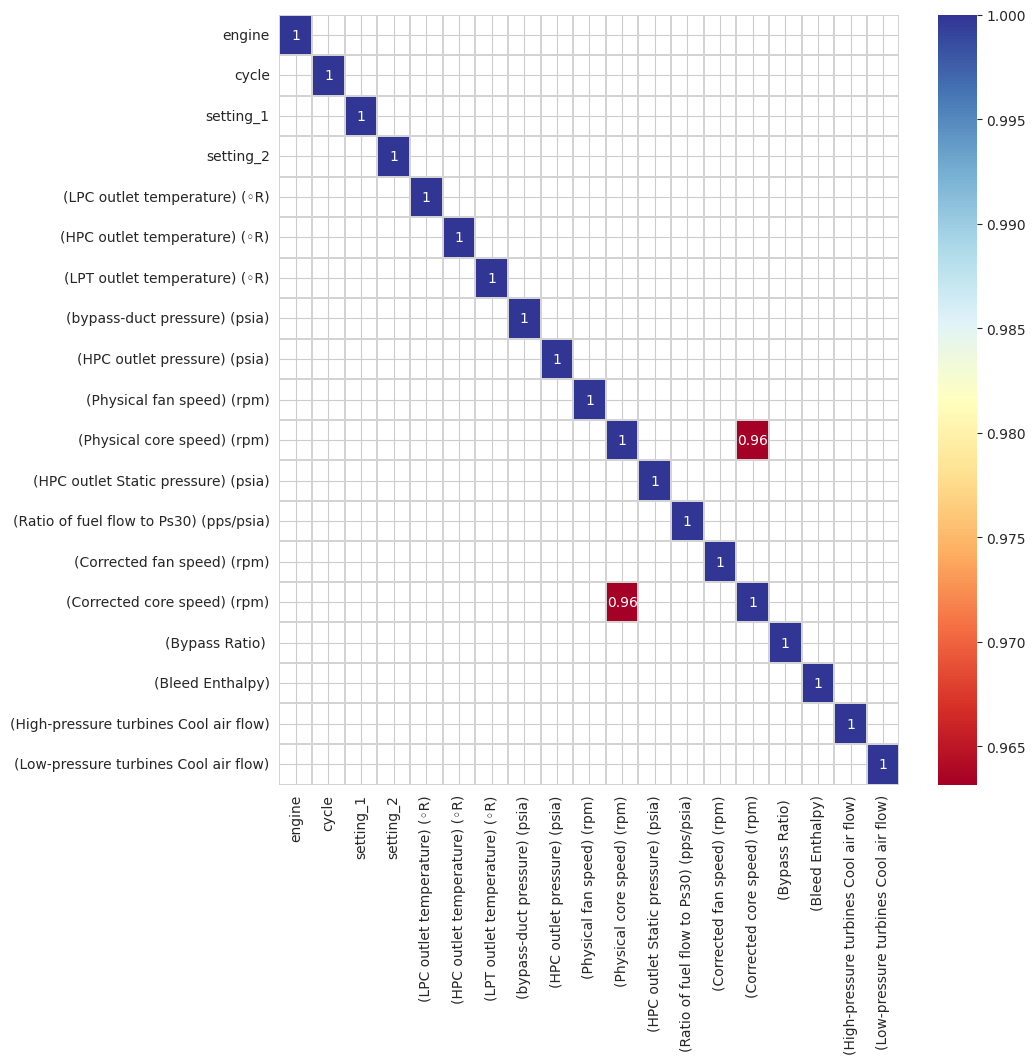

In [ ]:
threshold = 0.90
plt.figure(figsize=(10,10))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
data_train.drop(['(Corrected core speed) (rpm)'],axis=1,inplace=True)

In [ ]:
list(data_train)

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [ ]:
features = list(data_train.columns)
features

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [ ]:
data_train['(bypass-duct pressure) (psia)'].unique()

array([21.61, 21.6 ])

In [ ]:
(((data_train['(bypass-duct pressure) (psia)']==21.61).sum())/data_train.shape[0])*100

98.0319922443044

In [ ]:
data_train.drop(['(bypass-duct pressure) (psia)'],axis=1,inplace=True)

In [ ]:
z_scores = data_train.apply(lambda x: np.abs((x - x.mean()) / x.std()))

# set a threshold for the z-score
threshold = 3

# identify the outliers
outliers = z_scores > threshold

In [ ]:
z_scores = (data_train - data_train.mean()) / data_train.std()

# Replace values that exceed a certain threshold with the mode
threshold = 2.5
for col in data_train.columns:
    outlier_mask = z_scores[col].abs() > threshold
    data_train.loc[outlier_mask, col] = data_train[col].mask(outlier_mask).mode()[0]

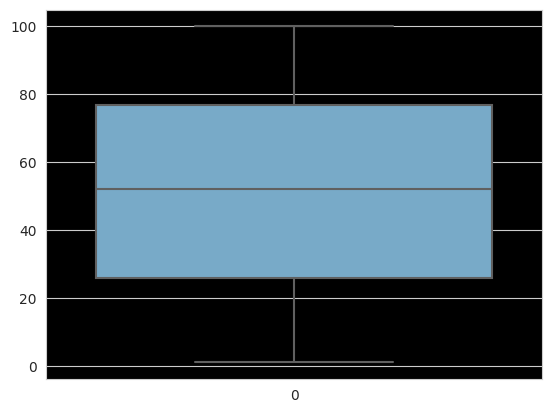

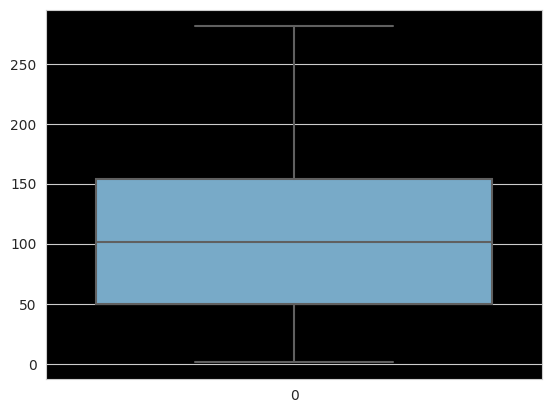

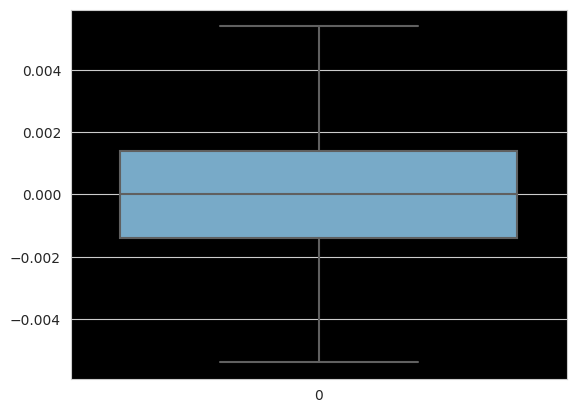

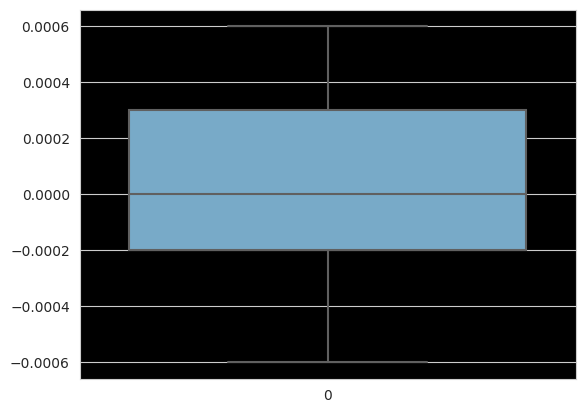

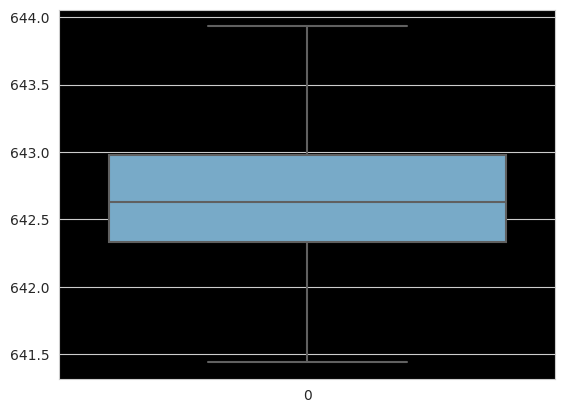

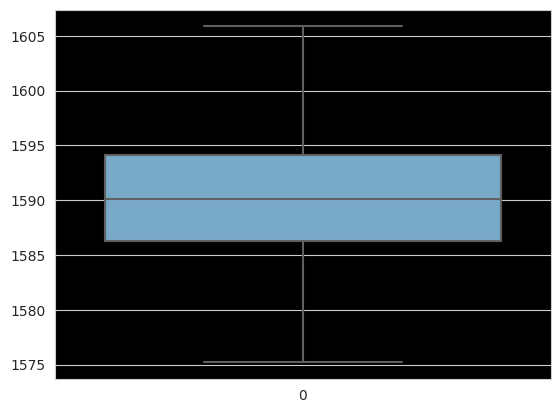

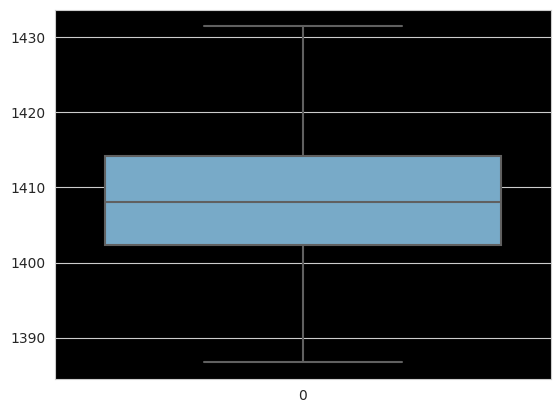

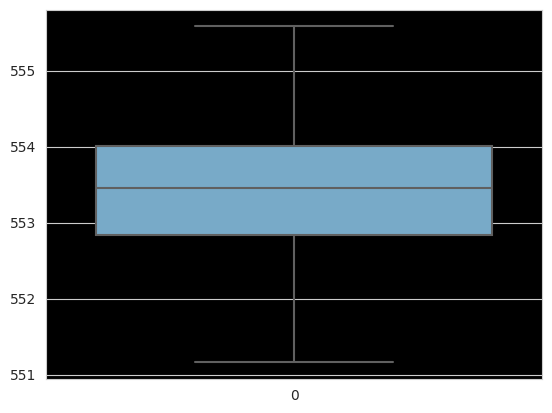

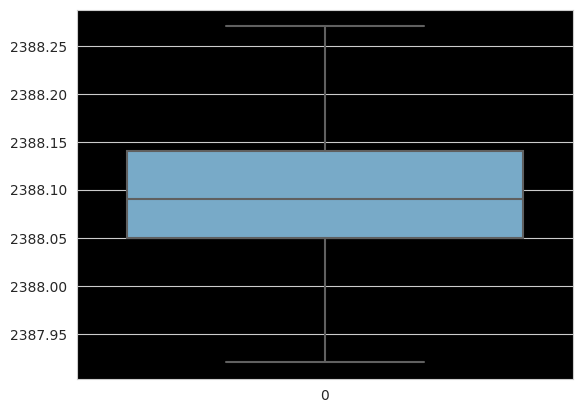

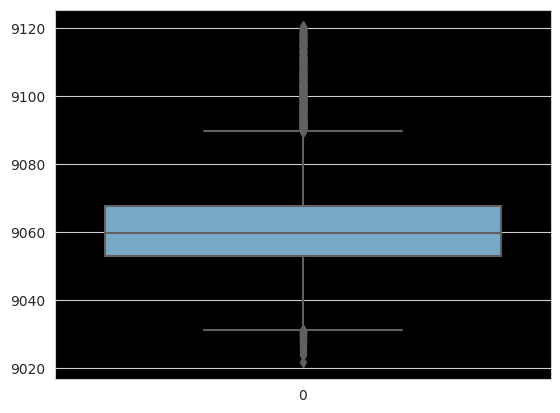

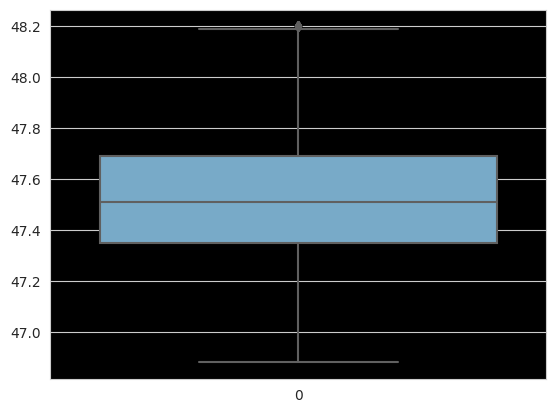

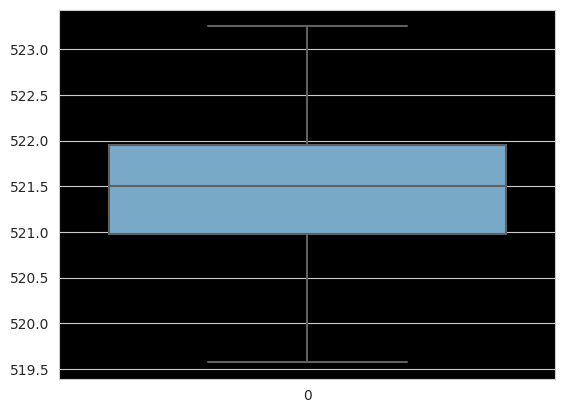

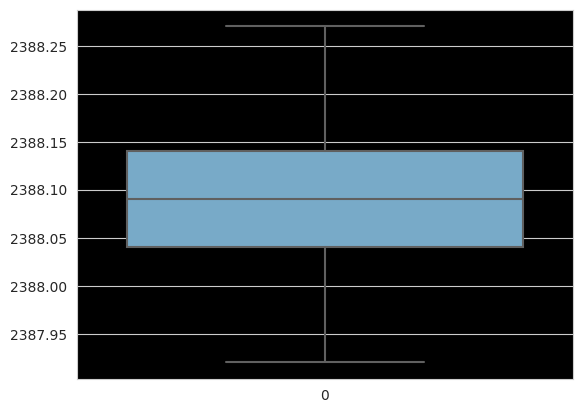

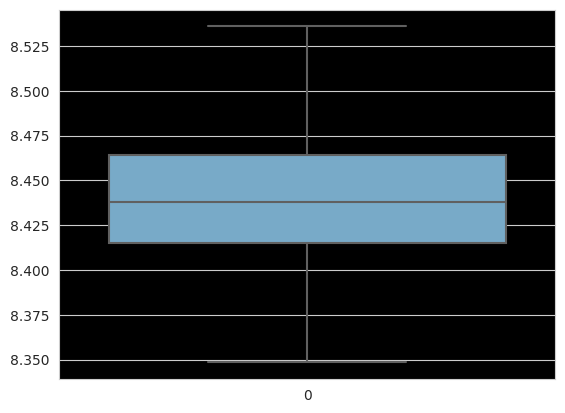

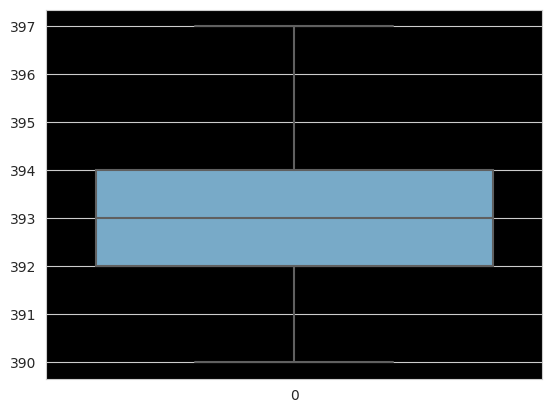

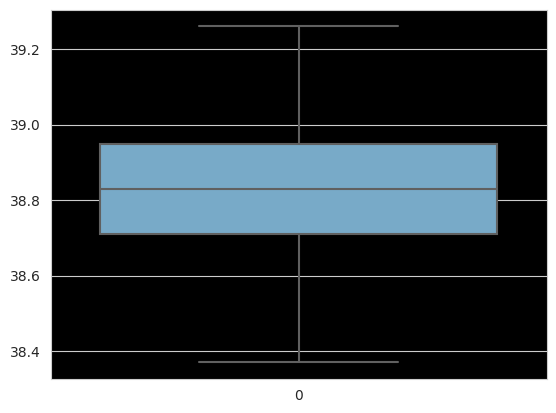

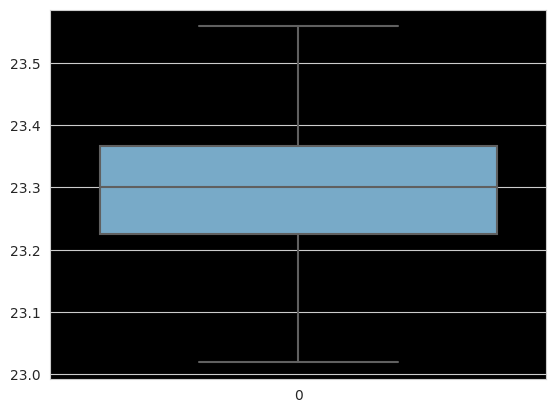

In [ ]:
for i in data_train.select_dtypes(include=np.number):
    sns.boxplot(data_train[i],palette="Blues")
    plt.show()

In [ ]:
data_train['cycle'].max()

281

In [ ]:
data_train_RUL = data_train.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL.head()

,life
engine,
1,192
2,281
3,179
4,189
5,269


In [ ]:
data_train=data_train.merge(data_train_RUL,how='left',on=['engine'])

In [ ]:
data_train['RUL']=data_train['life']-data_train['cycle']
data_train.drop(['life'],axis=1,inplace=True)
data_train['RUL'][data_train['RUL']>125]=125
data_train.head()

,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,125
1,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,125
2,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,125
3,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,125
4,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669,125


In [ ]:
data_train['RUL'].unique()

array([125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113,
       112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,
        99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,
        86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,
        73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,
        60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,
        47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,
        34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1,   0])

In [ ]:
x= data_train.iloc[:, :-1]
y = data_train.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (16504, 17)
x_test shape :  (4126, 17)
y_train shape :  (16504,)
y_test shape :  (4126,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# make predictions on the testing data
y_pred = model.predict(x_test)

In [ ]:
# evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")
print(f"mean_absolute_percentage_error: {mape}")

Mean squared error: 388.86517688250467
Root mean squared error: 19.719664725408105
R-squared score: 0.7699688573392395
mean_absolute_percentage_error: 290675942756313.3


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 388.86517688250467
Root mean squared error: 19.719664725408105
R-squared score: 0.7699688573392395


In [ ]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  LinearRegression() Has a training score of 78.0 % accuracy score


In [ ]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  LinearRegression() Has a training score of 78.0 % accuracy score
